# ENDF Parser Testing

This notebook demonstrates how to use the ENDF parser to read and work with ENDF files.

In [1]:
# Import our parser modules
from mcnpy.endf.read_endf import read_endf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the path to our test file
endf_filepath = '/home/MONLEON-JUAN/MCNPy/mcnpy/endf/files/n-026_Fe_056.endf'

In [3]:
endf_filepath = '/home/MONLEON-JUAN/MCNPy/mcnpy/endf/files/n-008_O_016.endf'

## Reading MF1 Sections

Demonstrating how to access MF1 sections including MT451.

In [3]:
# Parse only MF1 from the file
endf_mf1 = read_endf(endf_filepath, mf_numbers=1)
mf1 = endf_mf1.mf[1]
print(f"Parsed MF1 with {len(mf1.sections)} MT sections")

Parsed MF1 with 1 MT sections


In [4]:
mf1.sections[451].zaid

26056

In [6]:
endf = read_endf(endf_filepath)

DEBUG - Parsing MF34 MT2 with ZA=26056, AWR=55.4544, LTT=1, NMT1=1
DEBUG - Parsing subsection with MAT1=0, MT1=2, NL=6, NL1=6
DEBUG - Parsing sub-subsection with L=1, L1=1, LCT=0, NI=3
DEBUG - Parsed LB=5 record with LS=1, NE=11
DEBUG - Parsed LB=1 one-table record NE=16
DEBUG - Parsed LB=5 record with LS=1, NE=22
DEBUG - Parsing sub-subsection with L=1, L1=2, LCT=0, NI=1
DEBUG - Parsed LB=1 one-table record NE=16
DEBUG - Parsing sub-subsection with L=1, L1=3, LCT=0, NI=1
DEBUG - Parsed LB=1 one-table record NE=16
DEBUG - Parsing sub-subsection with L=1, L1=4, LCT=0, NI=1
DEBUG - Parsed LB=1 one-table record NE=16
DEBUG - Parsing sub-subsection with L=1, L1=5, LCT=0, NI=1
DEBUG - Parsed LB=1 one-table record NE=13
DEBUG - Parsing sub-subsection with L=1, L1=6, LCT=0, NI=1
DEBUG - Parsed LB=1 one-table record NE=13
DEBUG - Parsing sub-subsection with L=2, L1=2, LCT=0, NI=3
DEBUG - Parsed LB=5 record with LS=1, NE=11
DEBUG - Parsed LB=1 one-table record NE=16
DEBUG - Parsed LB=5 record w

In [7]:
endf

ENDF(3 files)

In [8]:
# Show directory information as DataFrame
mt451 = mf1.mt[451]
directory_df = mt451.directory

directory_df

,MF,MT,lines
0,1,451,1150
1,2,151,327
2,3,1,3965
3,3,2,3718
4,3,3,2423
...,...,...,...
287,33,808,1
288,33,809,1
289,33,810,1
290,33,849,1


In [9]:
# Access the MT451 object directly
print(f"ZAID: {mt451.zaid}")
print(f"Temperature: {mt451.temperature} K")
print(f"Laboratory: {mt451.laboratory}")
print(f"Authors: {mt451.authors}")

ZAID: 26056
Temperature: 0 K
Laboratory: NRG,CEA
Authors: EUROPEAN JOINT COLLABORATION


## Reading MF4 Sections

Demonstrating how to access MF4 sections with consistent interface.

In [3]:
# Read only MF4 sections
endf = read_endf(endf_filepath)

DEBUG - Parsing MF34 MT2 with ZA=26056, AWR=55.4544, LTT=1, NMT1=1
DEBUG - Parsing subsection with MAT1=0, MT1=2, NL=6, NL1=6
DEBUG - Parsing sub-subsection with L=1, L1=1, LCT=0, NI=3
DEBUG LB=5 - NE=11
DEBUG LB=5 - Symmetric matrix: 10x10, upper triangle = 55 elements
DEBUG LB=5 - Total values to read: 11 (energies) + 55 (matrix) = 66
DEBUG LB=5 - NT field says: 66 values
DEBUG LB=5 - Starting to read 66 values from data lines...
DEBUG LB=5 - Read line 4: [1e-05, 50000, 150000, 250000, 350000, 450000] (remaining: 60)
DEBUG LB=5 - Read line 5: [550000, 650000, 750000, 850000, 20000000, 0.09072] (remaining: 54)
DEBUG LB=5 - Read line 6: [0.01232, 0.01232, 0.01232, 0.01232, 0.01232, 0.01232] (remaining: 48)
DEBUG LB=5 - Read line 7: [0.01232, 0.01232, 0, 0.1804, 0.01232, 0.01232] (remaining: 42)
DEBUG LB=5 - Read line 8: [0.01232, 0.01232, 0.01232, 0.01232, 0.01232, 0] (remaining: 36)
DEBUG LB=5 - Read line 9: [0.0426, 0.01232, 0.01232, 0.01232, 0.01232, 0.01232] (remaining: 30)
DEBUG L

/home/MONLEON-JUAN/MCNPy/mcnpy/endf/parsers/parse_endf.py:57: UserWarning: Skipping MF sections without parsers: [2, 3, 6, 12, 14, 33]. Only parsing: [1, 4, 34]
  warnings.warn(f"Skipping MF sections without parsers: {skipped_mfs}. Only parsing: {parseable_mfs}")


In [4]:
print(endf.mf[4])

 2.605600+4 5.545440+1          0          3          0          02631 4  2    1
 0.000000+0 5.545440+1          0          2          0          02631 4  2    2
 0.000000+0 0.000000+0          0          0          1       17822631 4  2    3
       1782          2                                            2631 4  2    4
 0.000000+0 1.000000-5          0          0          4          02631 4  2    5
 0.000000+0 0.000000+0 0.000000+0 0.000000+0                      2631 4  2    6
 0.000000+0 1.584600+3          0          0          4          02631 4  2    7
 0.000000+0 0.000000+0 0.000000+0 0.000000+0                      2631 4  2    8
 0.000000+0 1.170900+4          0          0          4          02631 4  2    9
 1.114400-2 2.867900-5-6.457300-8 1.40440-11                      2631 4  2   10
 0.000000+0 1.503400+4          0          0          4          02631 4  2   11
-4.580400-3-1.470300-4 1.742400-7 2.90070-10                      2631 4  2   12
 0.000000+0 1.930500+4      

In [5]:
print(len(endf.mf[4].mt[2].tabulated_energies))
print(len(endf.mf[4].mt[2].legendre_coefficients))

28
1782


In [13]:
print(endf.mf[4].mt[2].get_legendre_coefficients(1.5e+6))

[0.2209, 0.2644, 0.10800000000000001, 0.0344, 0.003909, 0.004034]


In [18]:
print(endf.mf[4].mt[2].legendre_energies)
print(endf.mf[4].mt[2].legendre_coefficients)

[1e-05, 1584.6, 11709, 15034, 19305, 21875, 23579, 24176.000000000004, 24788, 26058, 28500, 31828, 34307, 40868, 46308.99999999999, 52474.99999999999, 56562, 67379, 72000, 79500, 82500, 86517, 98036.99999999999, 111090, 116790, 122770, 129070, 135690, 142640, 149960, 157640, 165730, 174220, 183160, 192550, 202420, 212800, 223710, 235180, 247240, 273240, 287250, 294520, 297200, 298500, 301970, 333730, 368830, 387740, 407620, 450490, 497870, 523400, 550230, 578440, 608100, 639280, 672060, 706510, 742740, 780820, 820850.0000000001, 850000, 851000, 852000, 852999.9999999999, 853999.9999999999, 855000.0000000001, 856000, 857000, 858000, 859000, 860000, 861000, 861999.9999999999, 863000.0000000001, 864000, 865000, 866000, 867000, 868000, 869000, 869999.9999999999, 871000.0000000001, 872000.0000000001, 873000, 874000, 875000, 876000, 877000, 877999.9999999999, 878999.9999999999, 880000.0000000001, 881000, 882000, 883000, 884000, 885000, 886000, 886999.9999999999, 888000.0000000001, 889000, 89

In [34]:
for key, value in endf.mf[4].mt[2].get_coefficients_dict().items():
    print(f"{key}: {value}")

1e-05: [0, 0, 0, 0]
1584.6: [0, 0, 0, 0]
11709: [0.011144000000000001, 2.8679000000000004e-05, -6.4573e-08, 1.4044e-11]
15034: [-0.0045804, -0.00014703, 1.7423999999999998e-07, 2.9007e-10]
19305: [0.022841999999999998, -0.0054322, -9.259600000000002e-05, 2.7984e-07]
21875: [-0.00064393, -0.00025565, 6.1279e-07, 6.9123e-10]
23579: [0.12102, 0.004118, -2.2481e-05, 2.2089e-08]
24176.000000000004: [0.072992, 0.045378999999999996, -0.00024463, 2.597e-07]
24788: [-0.039653, 0.00074615, -3.7086e-06, 4.3725e-09]
26058: [-0.011523000000000002, 7.915600000000001e-05, -2.9552999999999995e-07, 3.9789e-10]
28500: [0.0072099, -4.914799999999999e-06, -1.895e-07, 3.5590000000000003e-10]
31828: [0.072033, 0.051458000000000004, -2.4643e-06, 1.4002e-09]
34307: [0.042202, 0.08866199999999999, -1.0207999999999998e-06, 2.3740000000000003e-09]
40868: [0.043939000000000006, 0.13558, -1.2743e-06, 6.983100000000001e-09]
46308.99999999999: [0.044149, 0.13724, -2.4275e-06, 1.7427e-08]
52474.99999999999: [0.058815

In [20]:
mt = endf.mf[4].mt[56]

In [17]:
mt.num_lines

46

# Reading MF34

In [1]:
# Import our parser modules
from mcnpy.endf.read_endf import read_endf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the path to our test file
endf_filepath = '/home/MONLEON-JUAN/MCNPy/mcnpy/endf/files/n-026_Fe_056.endf'
endf_filepath = '/soft_snc/lib/endf/jeff32/neutrons/260560_32.endf'

In [3]:
# Read only MF4 sections
endf = read_endf(endf_filepath)

/home/MONLEON-JUAN/MCNPy/mcnpy/endf/parsers/parse_endf.py:65: UserWarning: Skipping MF sections without parsers: [2, 3, 6, 12, 14, 33]. Only parsing: [1, 4, 34]
  warnings.warn(f"Skipping MF sections without parsers: {skipped_mfs}. Only parsing: {parseable_mfs}")


In [4]:
mf34 = endf.mf[34]

In [5]:
mf34.mt[2].subsections[0].sub_subsections[0].records[1].f_table_k

[0,
 0.002041,
 0.002873,
 0.01443,
 0.00216,
 0.001281,
 0.001607,
 0.0005114,
 0.0006950000000000001,
 0.0006245000000000001,
 0.00024710000000000004,
 0.0002384,
 0.00015780000000000001,
 0.00014710000000000002,
 0,
 0]

In [6]:
endf.mf[34].mt[2].subsections[0].sub_subsections[0].records[0].matrix

[0.09072,
 0.01232,
 0.01232,
 0.01232,
 0.01232,
 0.01232,
 0.01232,
 0.01232,
 0.01232,
 0,
 0.1804,
 0.01232,
 0.01232,
 0.01232,
 0.01232,
 0.01232,
 0.01232,
 0.01232,
 0,
 0.0426,
 0.01232,
 0.01232,
 0.01232,
 0.01232,
 0.01232,
 0.01232,
 0,
 0.045810000000000003,
 0.01232,
 0.01232,
 0.01232,
 0.01232,
 0.01232,
 0,
 0.016550000000000002,
 0.01232,
 0.01232,
 0.01232,
 0.01232,
 0,
 0.016810000000000002,
 0.01232,
 0.01232,
 0.01232,
 0,
 0.032490000000000005,
 0.01232,
 0.01232,
 0,
 0.30720000000000003,
 0.01232,
 0,
 0.08148999999999999,
 0,
 0]

In [7]:
ang_cov = mf34.to_ang_covmat()

In [8]:
ang_cov

                  MF34 Angular Distribution Covariance Information                   

This object contains covariance matrix data for angular distributions (MF34).
Each matrix represents the covariance between Legendre coefficients for specific
isotope-reaction pairs across energy groups.

MF34 Covariance Data Summary:
-------------------------------------------------------------------------------------
Property                            Value                                          
-------------------------------------------------------------------------------------
Number of Covariance Matrices       21                                             
Number of Unique Isotopes           1                                              
Number of Unique Reactions          1                                              
Number of Unique Legendre Indices   6                                              
-------------------------------------------------------------------------------------


In [9]:
ang_cov.to_dataframe()

,ISO_H,REAC_H,L_H,ISO_V,REAC_V,L_V,ENE,STD
0,26056,2,1,26056,2,1,"[1e-05, 50000, 150000, 250000, 350000, 450000,...","[[0.09072, 0.01232, 0.01232, 0.01232, 0.01232,..."
1,26056,2,1,26056,2,2,"[1e-05, 850000, 1000000, 1200000, 1400000, 160...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,26056,2,1,26056,2,3,"[1e-05, 850000, 1000000, 1200000, 1400000, 160...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,26056,2,1,26056,2,4,"[1e-05, 850000, 1000000, 1200000, 1400000, 160...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,26056,2,1,26056,2,5,"[1e-05, 1400000, 1600000, 1800000, 2000000, 22...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5,26056,2,1,26056,2,6,"[1e-05, 1400000, 1600000, 1800000, 2000000, 22...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6,26056,2,2,26056,2,2,"[1e-05, 50000, 150000, 250000, 350000, 450000,...","[[0.07785, 0.006561, 0.006561, 0.006561, 0.006..."
7,26056,2,2,26056,2,3,"[1e-05, 850000, 1000000, 1200000, 1400000, 160...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
8,26056,2,2,26056,2,4,"[1e-05, 850000, 1000000, 1200000, 1400000, 160...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
9,26056,2,2,26056,2,5,"[1e-05, 1400000, 1600000, 1800000, 2000000, 22...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


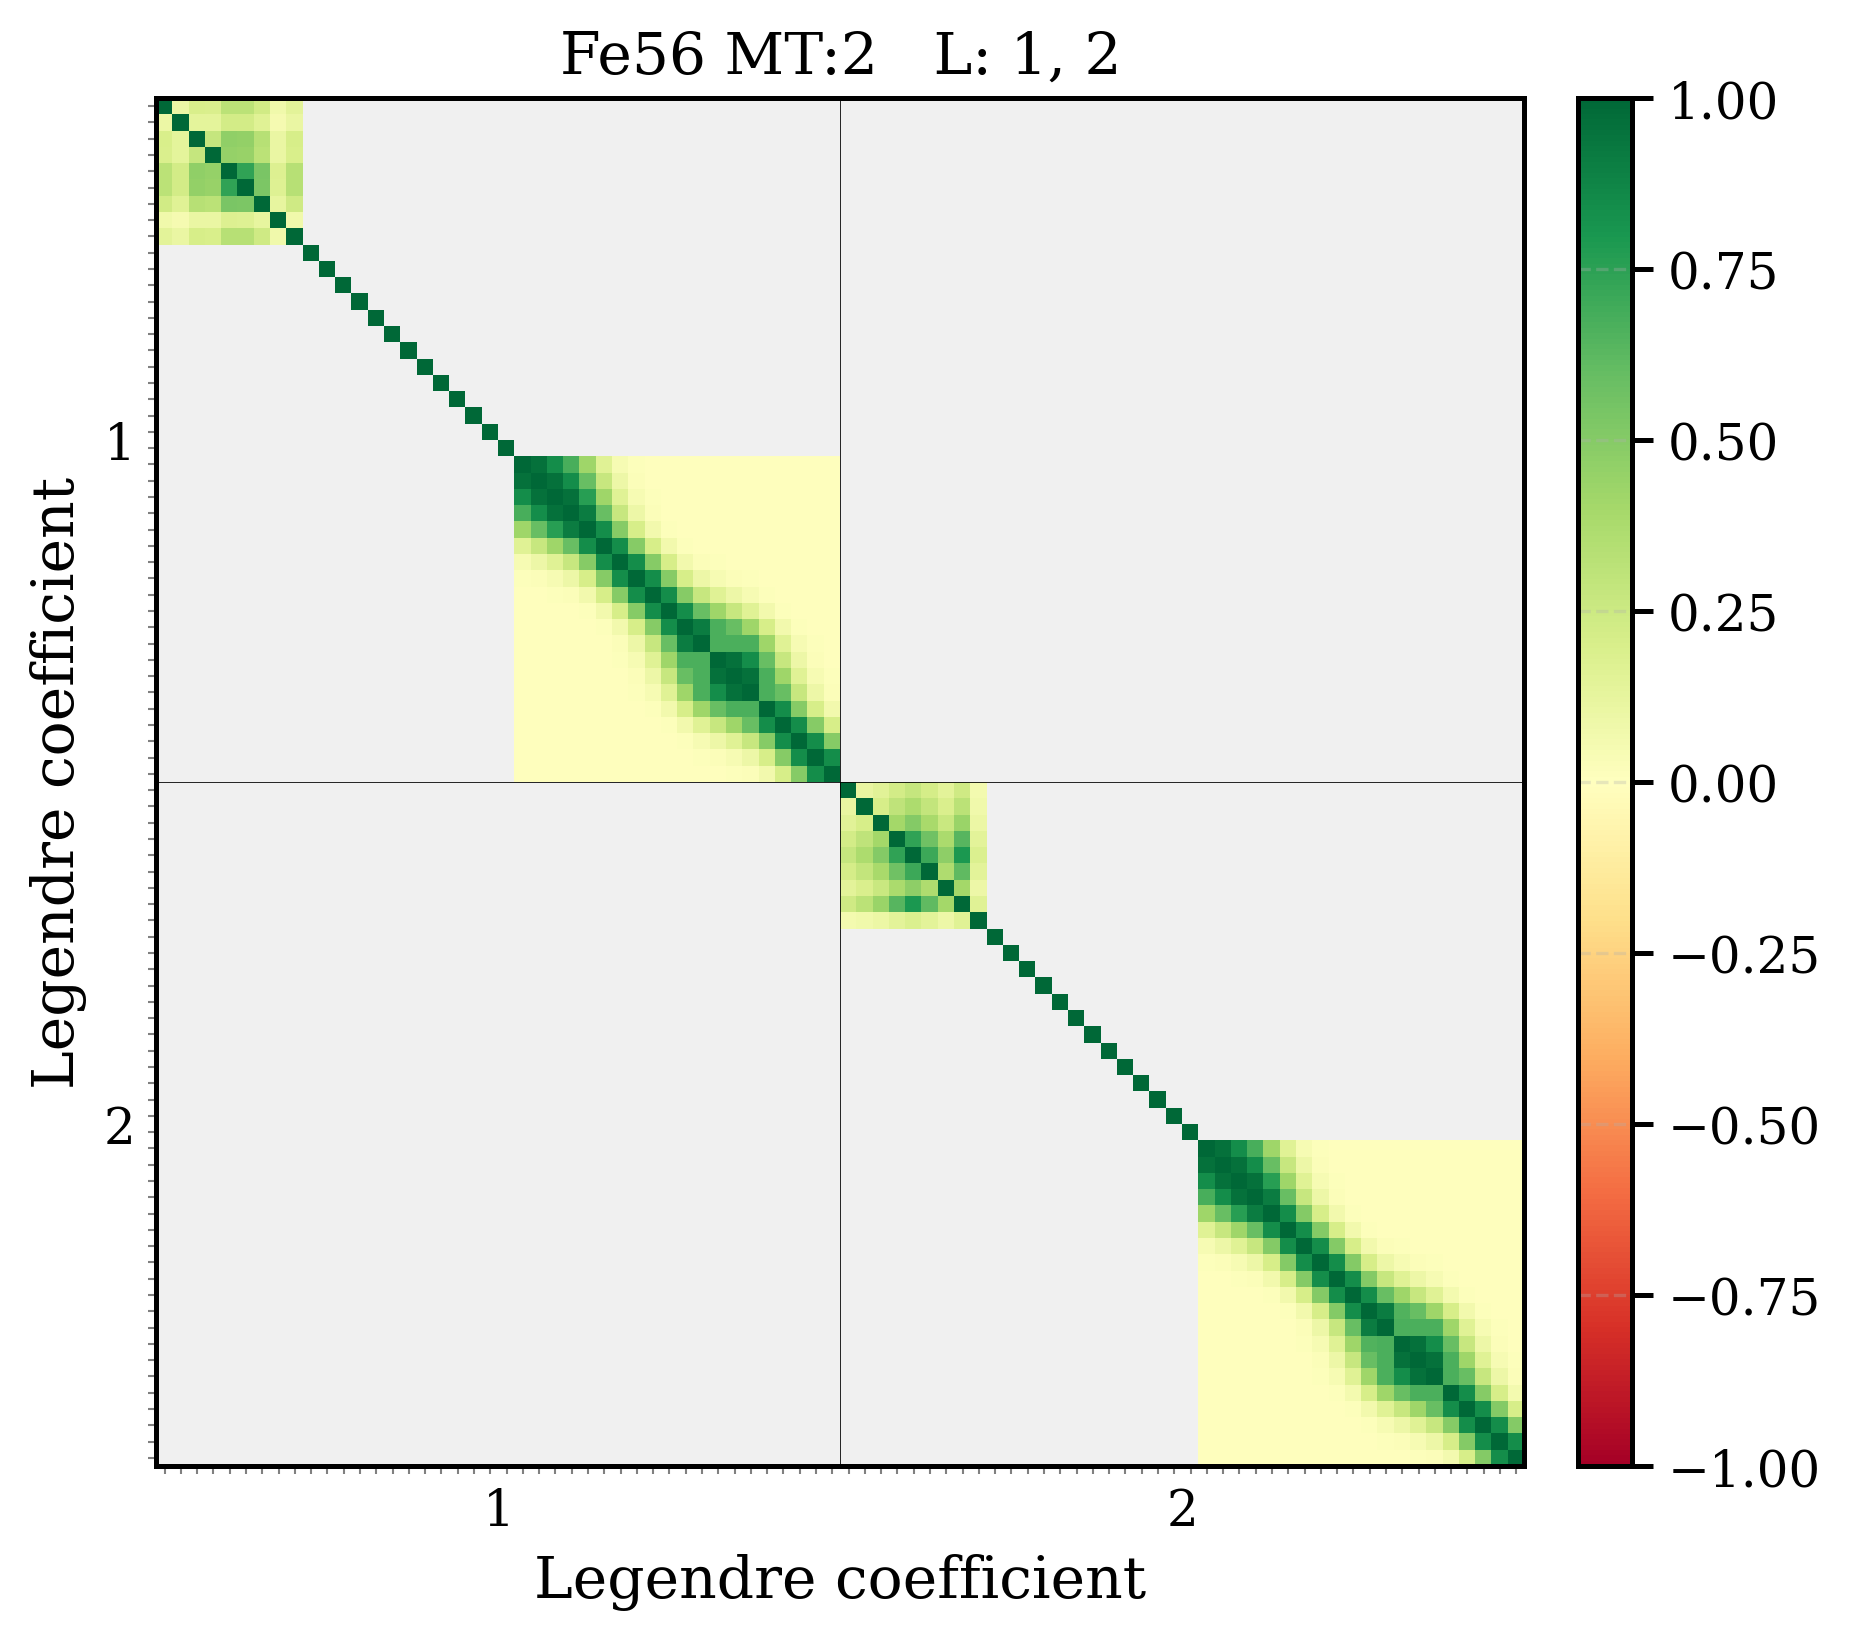

<Axes: title={'center': 'Fe56 MT:2   L: 1, 2'}, xlabel='Legendre coefficient', ylabel='Legendre coefficient'>

In [13]:
ang_cov.plot_covariance_heatmap(26056, 2, legendre_coeffs=[1,2], show_energy_ticks=True, show_uncertainties=False)

In [ ]:
ang_cov.matrices[0]

array([[0.09072   , 0.01232   , 0.01232   , ..., 0.        , 0.        ,
        0.        ],
       [0.01232   , 0.1804    , 0.01232   , ..., 0.        , 0.        ,
        0.        ],
       [0.01232   , 0.01232   , 0.0426    , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.0009    , 0.00075681,
        0.00045   ],
       [0.        , 0.        , 0.        , ..., 0.00075681, 0.0009    ,
        0.00075681],
       [0.        , 0.        , 0.        , ..., 0.00045   , 0.00075681,
        0.0009    ]], shape=(42, 42))

In [ ]:
ang_cov.unique_legendre_indices

{1, 2, 3, 4, 5, 6}

In [ ]:
df_ang = ang_cov.to_dataframe()

In [ ]:
print(len(df_ang.iloc[0]['STD'][9]))

42


In [ ]:
df_ang

,ISO_H,REAC_H,L_H,ISO_V,REAC_V,L_V,ENE,STD
0,26056,2,1,26056,2,1,"[1e-05, 50000, 150000, 250000, 350000, 450000,...","[[0.09072, 0.01232, 0.01232, 0.01232, 0.01232,..."
1,26056,2,1,26056,2,2,"[1e-05, 850000, 1000000, 1200000, 1400000, 160...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,26056,2,1,26056,2,3,"[1e-05, 850000, 1000000, 1200000, 1400000, 160...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,26056,2,1,26056,2,4,"[1e-05, 850000, 1000000, 1200000, 1400000, 160...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,26056,2,1,26056,2,5,"[1e-05, 1400000, 1600000, 1800000, 2000000, 22...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5,26056,2,1,26056,2,6,"[1e-05, 1400000, 1600000, 1800000, 2000000, 22...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6,26056,2,2,26056,2,2,"[1e-05, 50000, 150000, 250000, 350000, 450000,...","[[0.07785, 0.006561, 0.006561, 0.006561, 0.006..."
7,26056,2,2,26056,2,3,"[1e-05, 850000, 1000000, 1200000, 1400000, 160...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
8,26056,2,2,26056,2,4,"[1e-05, 850000, 1000000, 1200000, 1400000, 160...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
9,26056,2,2,26056,2,5,"[1e-05, 1400000, 1600000, 1800000, 2000000, 22...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [ ]:
for i in df_ang['ENE'][0]:
    print(f"{i:.5e}")

1.00000e-05
5.00000e+04
1.50000e+05
2.50000e+05
3.50000e+05
4.50000e+05
5.50000e+05
6.50000e+05
7.50000e+05
8.50000e+05
1.00000e+06
1.20000e+06
1.40000e+06
1.60000e+06
1.80000e+06
2.00000e+06
2.20000e+06
2.40000e+06
2.60000e+06
2.80000e+06
3.00000e+06
3.50000e+06
4.00000e+06
4.50000e+06
5.00000e+06
5.50000e+06
6.00000e+06
7.00000e+06
8.00000e+06
9.00000e+06
1.00000e+07
1.10000e+07
1.20000e+07
1.30000e+07
1.35000e+07
1.40000e+07
1.45000e+07
1.50000e+07
1.60000e+07
1.70000e+07
1.80000e+07
1.90000e+07
2.00000e+07


In [ ]:
len(df_ang['ENE'][0])

43

In [ ]:
df_ang['STD'][0][23]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0008618429000000001,
 0.0009000001,
 0.0008618429000000001,
 0.0007568069,
 0.0005293789,
 0.00024272100000000002,
 7.86926e-05,
 1.80404e-05,
 2.92443e-06,
 3.35214e-07,
 2.717e-08,
 3.28767e-09,
 4.811650000000001e-10,
 9.6864e-11,
 1.78814e-11,
 1.80841e-12,
 3.66441e-14,
 5.25043e-16,
 5.3195100000000006e-18,
 3.81095e-20]

In [ ]:
mf34.mt[2].subsections[0].sub_subsections[0].records[0].matrix

[0.09072,
 0.01232,
 0.01232,
 0.01232,
 0.01232,
 0.01232,
 0.01232,
 0.01232,
 0.01232,
 0,
 0.1804,
 0.01232,
 0.01232,
 0.01232,
 0.01232,
 0.01232,
 0.01232,
 0.01232,
 0,
 0.0426,
 0.01232,
 0.01232,
 0.01232,
 0.01232,
 0.01232,
 0.01232,
 0,
 0.045810000000000003,
 0.01232,
 0.01232,
 0.01232,
 0.01232,
 0.01232,
 0,
 0.016550000000000002,
 0.01232,
 0.01232,
 0.01232,
 0.01232,
 0,
 0.016810000000000002,
 0.01232,
 0.01232,
 0.01232,
 0,
 0.032490000000000005,
 0.01232,
 0.01232,
 0,
 0.30720000000000003,
 0.01232,
 0,
 0.08148999999999999,
 0,
 0]